# 第5章 分類１：アヤメの判別

アヤメの種類を判別する決定木モデルを構築しましょう。

読み込むCSVファイル  「iris2.csv」

### データを読み込む

**問1**  
「iris2.csv」を読み込み、先頭の10行を表示してください

In [25]:
# pandasのインポート
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('iris2.csv')

# 先頭10行を表示する
df.head(10)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa
3,0.08,0.46,0.26,0.04,Iris-setosa
4,0.19,0.67,0.44,0.04,Iris-setosa
5,0.31,0.79,0.04,0.13,Iris-setosa
6,NaN,NaN,NaN,NaN,NaN
7,0.19,0.58,0.47,0.04,Iris-setosa
8,0.03,0.38,0.02,0.04,Iris-setosa
9,0.17,0.46,0.45,0.03,Iris-setosa


▶実行結果

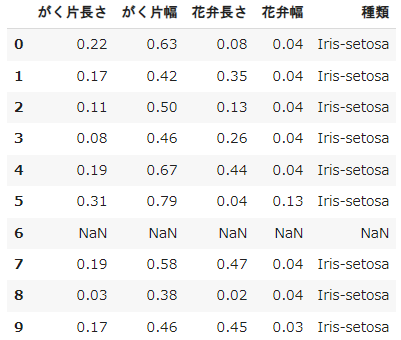

**問2**  
読み込んだデータの行数、列数を表示してください

In [26]:
# データの行数、列数を表示する
df.shape

(150, 5)

▶実行結果

(150, 5)

### 「種類」列について調べる

**問3**  
読み込んだデータの「種類」列のデータの種類を表示してください

In [27]:
df['種類'].unique()

array(['Iris-setosa', nan, 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

▶実行結果

array(['Iris-setosa', nan, 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

**問4**  
読み込んだデータの「種類」列のデータごとの出現回数を表示してください

In [28]:
df['種類'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: 種類, dtype: int64

▶実行結果

Iris-versicolor    50  
Iris-virginica     50  
Iris-setosa        49  
Name: 種類, dtype: int64

### 欠損値を調べる

**問5**  
各列の欠損値の有無をTrue/Falseで表示してください

In [29]:
df.isnull().any(axis=0)

がく片長さ    True
がく片幅     True
花弁長さ     True
花弁幅      True
種類       True
dtype: bool

▶実行結果

がく片長さ    True  
がく片幅     True  
花弁長さ     True  
花弁幅      True  
種類       True  
dtype: bool

**問6**  
各列の欠損値の個数を表示してください

In [30]:
df.isnull().sum()

がく片長さ    3
がく片幅     2
花弁長さ     3
花弁幅      3
種類       1
dtype: int64

▶実行結果

がく片長さ    3  
がく片幅     2  
花弁長さ     3  
花弁幅      3  
種類       1  
dtype: int64

### 欠損値を削除する(行 その1)

**問7**  
dfで**欠損値を含む行**を削除してください。

In [31]:
# 欠損値を含む行を削除する
df_dropna_row_any = df.dropna(how='any', axis=0)

**問8**  
削除後データでは欠損値が削除されて行数が減っていることを確認してください。

In [32]:
# 削除後データの行数、列数を表示し、行が減っていることを確認する
df_dropna_row_any.shape

(142, 5)

▶実行結果

(142, 5)

**問9**  
削除後データの各列の欠損値の個数を表示し、欠損値が無いことを確認してください

In [33]:
df_dropna_row_any.isnull().sum()

がく片長さ    0
がく片幅     0
花弁長さ     0
花弁幅      0
種類       0
dtype: int64

▶実行結果

がく片長さ    0  
がく片幅     0  
花弁長さ     0  
花弁幅      0  
種類       0  
dtype: int64

### 欠損値を削除する(行 その2)

**問10**  
dfで**全ての列が欠損値の行**を削除してください。  
また、欠損値が削除されたことを確認してください。

In [34]:
# 欠損値を含む行を削除する
df_dropna_row_all = df.dropna(how='all', axis=0)

# 削除後データの行数、列数を表示し、行が減っていることを確認する
df_dropna_row_all.shape

(149, 5)

▶実行結果

(149, 5)

**問11**  
削除後データの各列の欠損値の個数を表示し、欠損値が減っていることを確認してください

In [35]:
df_dropna_row_all.isnull().sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

▶実行結果

がく片長さ    2  
がく片幅     1  
花弁長さ     2  
花弁幅      2  
種類       0  
dtype: int64

### 欠損値を削除する(列)

**問12**  
dfで**欠損値を含む列**を削除してください。  
また、列が削除されたことを確認してください。

In [36]:
# 欠損値を含む列を削除する
df_dropna_column_any = df.dropna(how='any', axis=1)

# 削除後データの行数、列数を表示し、列が減っていることを確認する
df_dropna_column_any.shape

(150, 0)

▶実行結果

(150, 0)

### 欠損値の値を他の値に置き換える

問10で作成した、すべての列が欠損値の行を消したあとのデータ(df_dropna_row_all)を使って、欠損値を下記のように置き換えます。
* がく片長さ　…　がく片長さの平均値
* がく片幅　…　がく片幅の平均値
* 花弁長さ　…　花弁長さの中央値
* 花弁幅　…　花弁幅の中央値

※df_dropna_row_allを変えないように、df_preprocessedにデータをコピーし、df_preprocessedの値を書き換えていきます。

In [37]:
# df_dropna_row_allをコピーし、df_preprocessedに代入する
df_preprocessed = df_dropna_row_all.copy()

**問13**  
df_dropna_row_allの以下の値を表示してください
* がく片長さ　…　がく片長さの平均値
* がく片幅　…　がく片幅の平均値
* 花弁長さ　…　花弁長さの中央値
* 花弁幅　…　花弁幅の中央値

In [38]:
print('がく片長さの平均値:', df_dropna_row_all['がく片長さ'].mean())

print('がく片幅の平均値:', df_dropna_row_all['がく片幅'].mean())

print('花弁長さの中央値:', df_dropna_row_all['花弁長さ'].median())

print('花弁幅の中央値:', df_dropna_row_all['花弁幅'].median())

がく片長さの平均値: 0.42319727891156467
がく片幅の平均値: 0.4394594594594597
花弁長さの中央値: 0.49
花弁幅の中央値: 0.5


▶実行結果  
がく片長さの平均値: 0.42319727891156467  
がく片幅の平均値: 0.4394594594594597  
花弁長さの中央値: 0.49  
花弁幅の中央値: 0.5  

**問14**  
それぞれの列の欠損値を穴埋めしてください

In [39]:
# がく片長さの欠損値を置き換え、結果をdf_preprocessedに代入する
df_preprocessed['がく片長さ'] = df_dropna_row_all['がく片長さ'].fillna(df_dropna_row_all['がく片長さ'].mean())

# がく片幅の欠損値を置き換え、結果をdf_preprocessedに代入する
df_preprocessed['がく片幅'] = df_dropna_row_all['がく片幅'].fillna(df_dropna_row_all['がく片幅'].mean())

# 花弁長さの欠損値を置き換え、結果をdf_preprocessedに代入する
df_preprocessed['花弁長さ'] = df_dropna_row_all['花弁長さ'].fillna(df_dropna_row_all['花弁長さ'].median())

# 花弁幅の欠損値を置き換え、結果をdf_preprocessedに代入する
df_preprocessed['花弁幅'] = df_dropna_row_all['花弁幅'].fillna(df_dropna_row_all['花弁幅'].median())

# 各列の欠損値の有無（True/False）を表示し、欠損値が無いことを確認してください
df_preprocessed.isnull().any(axis=0)

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

▶実行結果  
がく片長さ    False  
がく片幅     False  
花弁長さ     False  
花弁幅      False  
種類       False  
dtype: bool

### 特徴量と正解データに分割する

特徴量と正解データを以下の列とします
* 特徴量　…　「がく片長さ」「がく片幅」「花弁長さ」「花弁幅」
* 正解データ　…　「種類」

**問15**  
df_preprocessedから、特徴量を取り出して変数Xに、正解データを取り出して変数yに代入してください

In [40]:
# 特徴量をXに代入し、先頭5行を表示する
X = df_preprocessed[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
print('特徴量')
print(X.head())

# 正解データをyに代入し、先頭5行を表示する
y = df_preprocessed['種類']
print('正解データ')
print(y.head())

特徴量
   がく片長さ  がく片幅  花弁長さ   花弁幅
0   0.22  0.63  0.08  0.04
1   0.17  0.42  0.35  0.04
2   0.11  0.50  0.13  0.04
3   0.08  0.46  0.26  0.04
4   0.19  0.67  0.44  0.04
正解データ
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 種類, dtype: object


▶実行結果  
特徴量  
   がく片長さ  がく片幅  花弁長さ   花弁幅  
0   0.22  0.63  0.08  0.04  
1   0.17  0.42  0.35  0.04  
2   0.11  0.50  0.13  0.04  
3   0.08  0.46  0.26  0.04  
4   0.19  0.67  0.44  0.04  
正解データ  
0    Iris-setosa  
1    Iris-setosa  
2    Iris-setosa  
3    Iris-setosa  
4    Iris-setosa  
Name: 種類, dtype: object

### ホールドアウト法で訓練データ、テストデータに分割する

**問16**  
X、yを訓練データ、テストデータに分割してください。  
テストデータに使用する割合を30%、乱数シードは0とする。

In [41]:
# データ分割で使用するモジュールをインポートする
from sklearn.model_selection import train_test_split

# X, yを訓練データ、テストデータに分割する
# * テストデータに使用する割合を30%、乱数シードは0とする
# * 訓練データの特徴量を格納する変数名はX_trainとする
# * テストデータの特徴量を格納する変数名はX_testとする
# * 訓練データの正解データを格納する変数名はy_trainとする
# * テストデータの正解データを格納する変数名はy_testとする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Xの行数、列数を表示する
print(X.shape)

# X_trainの行数、列数を表示する
print(X_train.shape)

# X_testの行数、列数を表示する
print(X_test.shape)

(149, 4)
(104, 4)
(45, 4)


▶実行結果

(149, 4)  
(104, 4)  
(45, 4)

### 学習と評価

**問17**  
訓練データでモデルを学習させてください  
訓練データでの正解率、テストデータの正解率を求めてください

In [42]:
# scikitlearnの決定木をインポートする
from sklearn import tree

# 決定木モデルを生成し、modelに代入する
# * 最大の深さは2とする
# * 乱数シードは0とする
model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)

# 訓練データで学習を実行する
model.fit(X_train, y_train)

# 訓練データの正解率を表示する
print('訓練データでの正解率:', model.score(X_train, y_train))

# テストデータの正解率を表示する
print('テストデータでの正解率:', model.score(X_test, y_test))

訓練データでの正解率: 0.9615384615384616
テストデータでの正解率: 0.8888888888888888


▶実行結果

訓練データでの正解率: 0.9615384615384616  
テストデータでの正解率: 0.8888888888888888

### 新たなデータで予測する

**問18**  
以下の表のデータで予測し、結果を表示してください

|がく片長さ|がく片幅|花弁長さ|花弁幅|
| ----: | ----: | ----: | ----: |
|0.75|0.6|0.3|0.08|
|0.53|0.3|0.4|0.6|
|0.6|0.6|0.6|1|


In [43]:
# データを格納したデータフレームを生成する
predict_data = pd.DataFrame([[0.75, 0.6, 0.3, 0.08],
                             [0.53, 0.3, 0.4, 0.6],
                             [0.6, 0.6, 0.6, 1]])

# 作成したデータフレームを用いて予測し、結果を表示する
model.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

▶実行結果

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"　　
array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 分岐条件を調べる

**問19**  
特徴量の列名、分岐条件の列、分岐条件の閾値を表示してください

In [44]:
print("==列名==")
# 特徴量(X_train)の列名を表示する
print(X_train.columns)

print("==分岐条件の列==")
# model(決定木)の分岐条件の列を表示する
print(model.tree_.feature)

print("==閾値==")
# model(決定木)の分岐条件の閾値を表示する
print(model.tree_.threshold)

==列名==
Index(['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅'], dtype='object')
==分岐条件の列==
[ 3 -2  3 -2 -2]
==閾値==
[ 0.29499999 -2.          0.69       -2.         -2.        ]


▶実行結果

==列名==  
Index(['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅'], dtype='object')  
==分岐条件の列==  
[ 3 -2  3 -2 -2]  
==閾値==  
[ 0.29499999 -2.          0.69       -2.         -2.        ]

**問20**  
リーフに到達した各分類のデータ数、各分類がどの種類を示すのか、を表示してください

In [45]:
print("==リーフの各分類のデータ数==")
# 決定木の各末端ノード(3箇所)について、到達したデータ数を表示する
# ヒント：問26の「分岐条件の列」が「-2」となっているインデックスが、末端ノードのインデックスになる
print(model.tree_.value[1])
print(model.tree_.value[3])
print(model.tree_.value[4])

print("==各分類の種類==")
# 各分類がどの種類を示しているのかを表示する
print(model.classes_)


==リーフの各分類のデータ数==
[[33.  0.  0.]]
[[ 0. 34.  4.]]
[[ 0.  0. 33.]]
==各分類の種類==
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


▶実行結果

==リーフの各分類のデータ数==  
[[33.  0.  0.]]  
[[ 0. 34.  4.]]  
[[ 0.  0. 33.]]  
==各分類の種類==  
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

**問21**  
plot_tree関数を使って、決定木を描画してください

[Text(0.4, 0.8333333333333334, 'kaben_haba <= 0.295\ngini = 0.666\nsamples = 104\nvalue = [33, 34, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.6, 0.5, 'kaben_haba <= 0.69\ngini = 0.499\nsamples = 71\nvalue = [0, 34, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

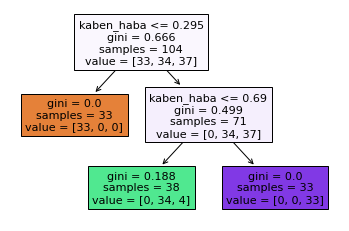

In [46]:
# X_trainの列名を英字にする
X_train.columns = ['gaku_nagasa', 'gaku_haba', 'kaben_nagasa', 'kaben_haba']

# X_trainの場合の決定木を描画する
tree.plot_tree(model, feature_names = X_train.columns, filled=True)

▶実行結果

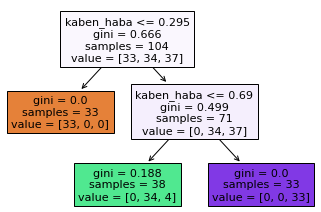

### モデルの保存

**問22**  
学習済みモデルを「chapter05_model.pkl」という名前で保存してください

In [47]:
# 必要なライブラリをインポートする
import pickle

# モデルを「chapter05_model.pkl」という名前で保存する
with open('chapter05_model.pkl', 'wb') as f:
    pickle.dump(model, f)

**問23**  
保存した「chapter05_model.pkl」をmodel2という名前で読み込み、問18のデータを予測した結果を表示してください

In [48]:
# 保存したモデルを読み込む
with open('chapter05_model.pkl', 'rb') as f:
    model2 = pickle.load(f)

# 読み込んだモデルで予測し、結果を表示する
model2.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

▶実行結果  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"  
array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)